In this note we would like to explain two concepts.
* What is Bias–Variance Tradeoff
* What __Polinomial Regression__ is. 

## Diabetes dataset

In [67]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from sklearn import datasets

In [68]:
matplotlib.rcParams['figure.figsize'] = [20, 10]

In [69]:
data = datasets.load_diabetes()

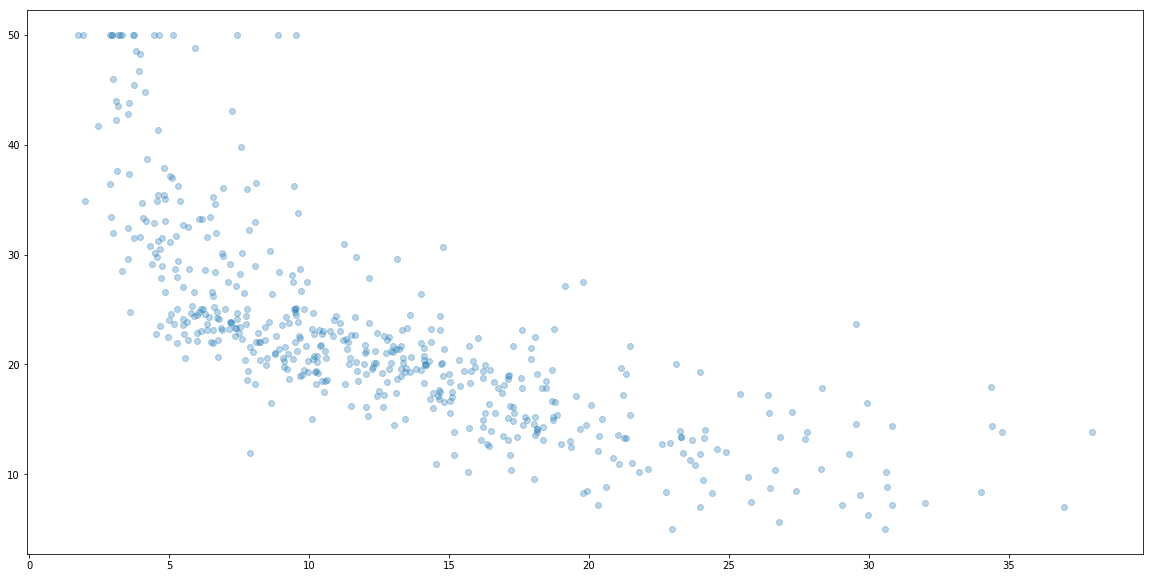

In [70]:
from sklearn.datasets import load_boston
data = load_boston()

X = data.data[:, [12]]
y = data.target

plt.scatter(X[:, 0], y, alpha=0.3)
#plt.xlabel("Body mass index")
#plt.ylabel("Disease progression")

In [71]:
MAX_DEG = 12
X = np.concatenate([X[:, [0]]**i for i in range(1, MAX_DEG+1)], axis=1)

In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=600, test_size=0.2)

In [73]:
from sklearn.metrics import mean_squared_error

def fit_and_evaluate(reg, columns, X_train, X_test, y_test):
    reg.fit(X_train[:, columns], y_train)
    y_train_hat = reg.predict(X_train[:, columns])
    y_test_hat = reg.predict(X_test[:, columns])
    return np.sqrt(mean_squared_error(y_train, y_train_hat)), np.sqrt(mean_squared_error(y_test, y_test_hat))

from sklearn.linear_model import LinearRegression

performance = pd.DataFrame(
        columns=["deg", "MSE_train", "MSE_test"]
    )
regs = []
for i in range(1, MAX_DEG+1):
    reg = LinearRegression()
    mses = fit_and_evaluate(reg, list(range(i)), X_train, X_test, y_test)
    new_row = pd.DataFrame({
        "deg": [i], 
        "MSE_train": [mses[0]],
        "MSE_test": [mses[1]]
    })
    performance = performance.append(new_row, ignore_index = True) 
    regs.append(reg)
performance

,deg,MSE_train,MSE_test
0,1,6.262491,6.012471
1,2,5.440431,5.849785
2,3,5.302754,5.751502
3,4,5.201214,5.565272
4,5,5.134302,5.494602
5,6,5.131392,5.477852
6,7,5.126123,5.504436
7,8,5.111018,5.536477
8,9,5.076636,5.685176
9,10,5.110691,5.504749


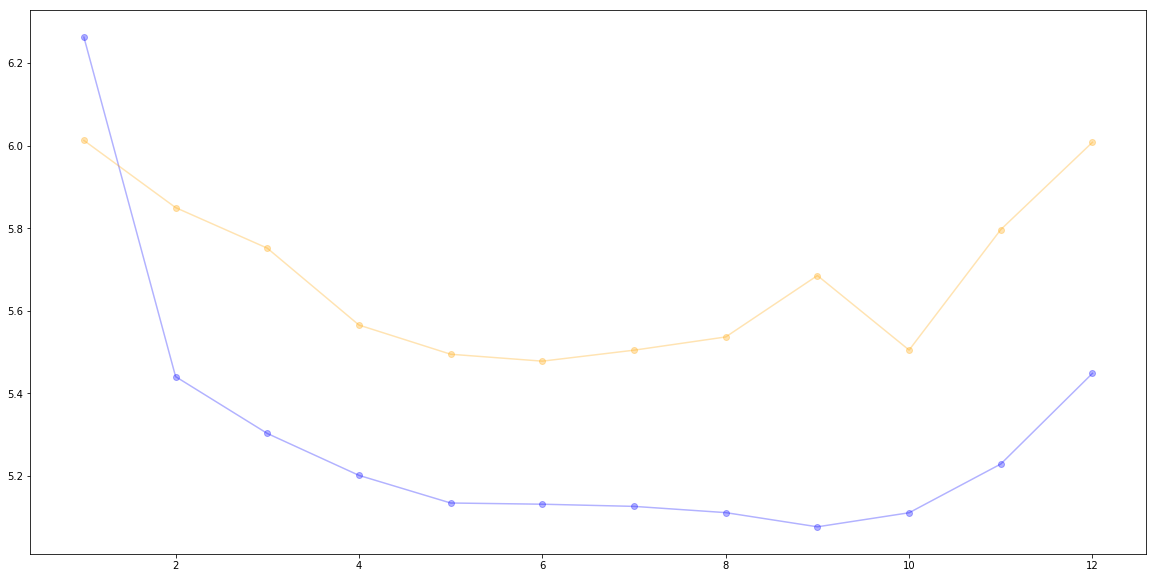

In [74]:
plt.scatter(performance["deg"], performance["MSE_train"], alpha = 0.3, c="blue")
plt.plot(performance["deg"], performance["MSE_train"], alpha = 0.3, c="blue")
plt.scatter(performance["deg"], performance["MSE_test"], alpha = 0.3, c="orange")
plt.plot(performance["deg"], performance["MSE_test"], alpha = 0.3,  c="orange")

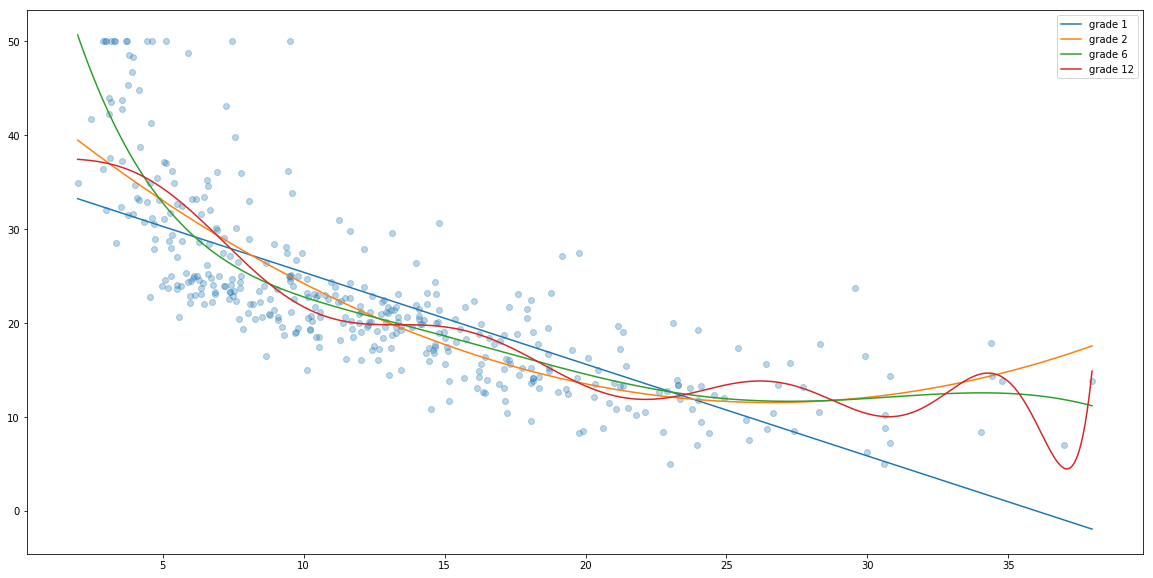

In [115]:
minx, maxx = min(X_train[:, 0]), max(X_train[:, 0])
xs = np.expand_dims(np.linspace(minx, maxx, num=1000), axis=1)
Xs = np.concatenate([xs**i for i in range(1, MAX_DEG+1)], axis=1)

plt.scatter(X_train[:, 0], y_train, alpha=0.3)

for i in [0, 1, 5, 11]:
    ys = regs[i].predict(Xs[:, list(range(i+1))])
    plt.plot(xs, ys, alpha=1, label="grade " + str(i+1))
plt.legend()

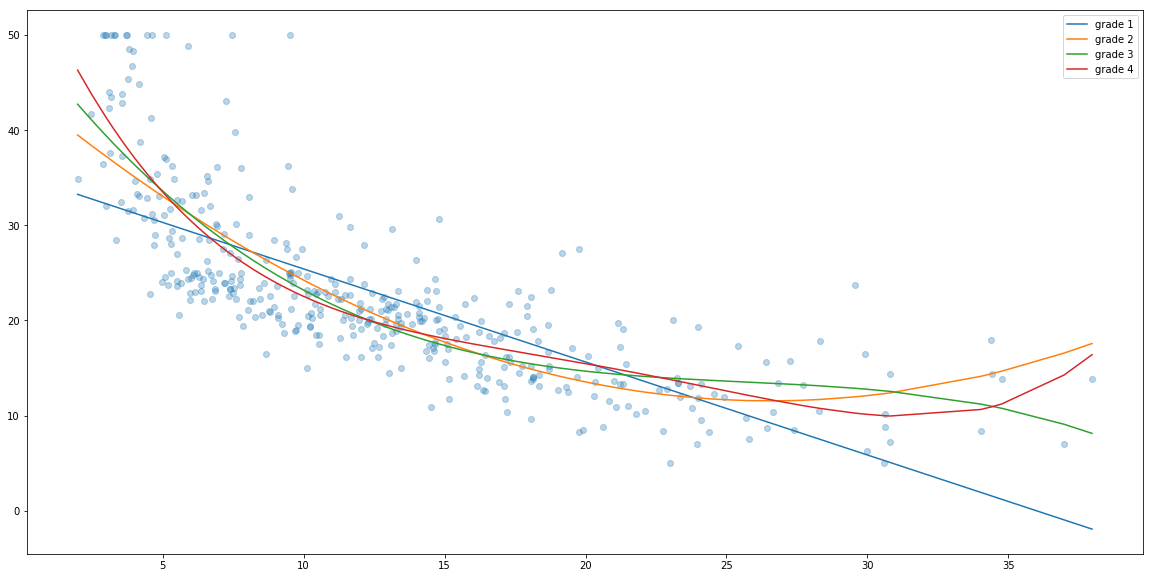

In [82]:
plt.scatter(X_train[:, 0], y_train, alpha=0.3)
for i in range(4):
    X_train_sorted = X_train
    y_train_hat = regs[i].predict(X_train[:, list(range(i+1))])
    plt.plot(
        X_train[:, 0][X_train[:, 0].argsort()], 
        y_train_hat[X_train[:, 0].argsort()], 
        alpha=1,
        label="grade " + str(i+1)
    )
plt.legend()

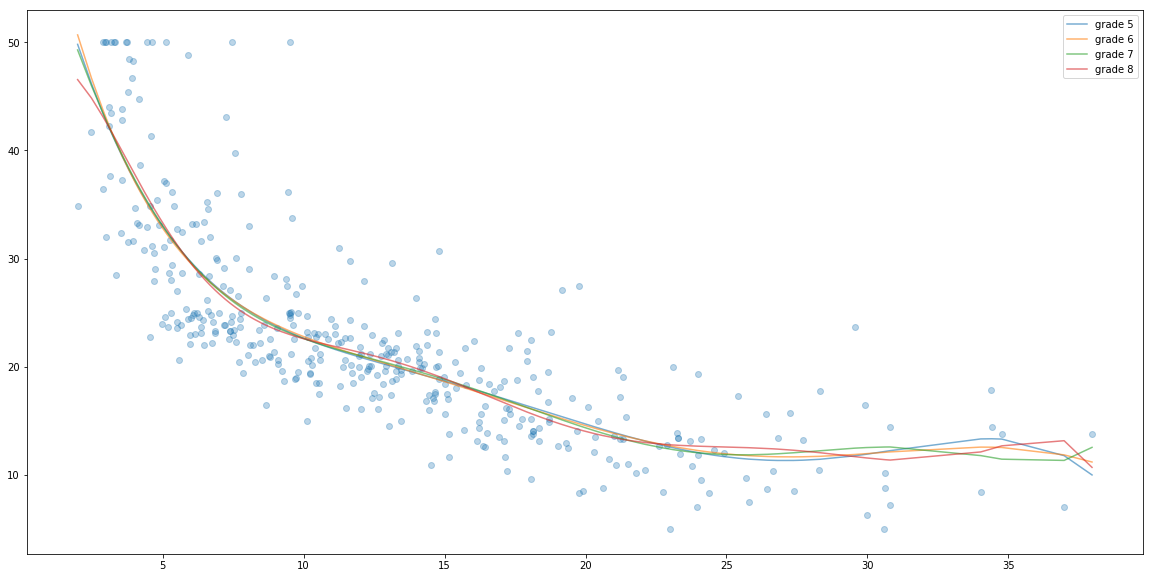

In [83]:
plt.scatter(X_train[:, 0], y_train, alpha=0.3)
for i in range(4, 8):
    X_train_sorted = X_train
    y_train_hat = regs[i].predict(X_train[:, list(range(i+1))])
    plt.plot(
        X_train[:, 0][X_train[:, 0].argsort()], 
        y_train_hat[X_train[:, 0].argsort()], 
        alpha=0.6,
        label="grade " + str(i+1)
    )
plt.legend()

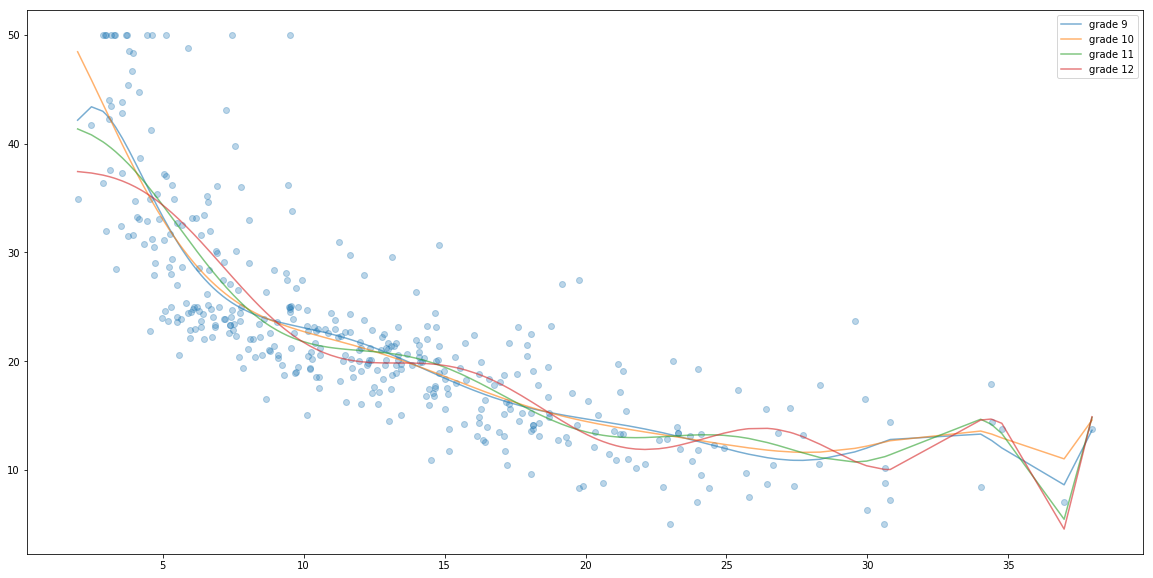

In [84]:
plt.scatter(X_train[:, 0], y_train, alpha=0.3)
for i in range(8, 12):
    X_train_sorted = X_train
    y_train_hat = regs[i].predict(X_train[:, list(range(i+1))])
    plt.plot(
        X_train[:, 0][X_train[:, 0].argsort()], 
        y_train_hat[X_train[:, 0].argsort()], 
        alpha=0.6,
        label="grade " + str(i+1)
    )
plt.legend()